In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In this lab we focus on the numerical values of the dataset, where we generate the density plots to see if there is a good fit to normal or exponential distributions and after that we apply the log transformation and see if they help to better fit the model 

# 1. load the dataset 

In [32]:
dataset = pd.read_csv('marketing_customer_analysis (1).csv')
dataset.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# 2. get numerical values  

In [17]:
num = dataset.select_dtypes(include=np.number)
num

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


# 3. check for exponential fit 

We plot the corresponding distributions to see if they better adjust to an exponential or normal one 

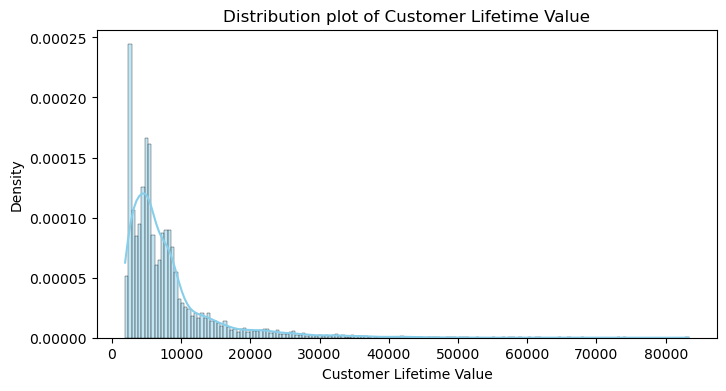

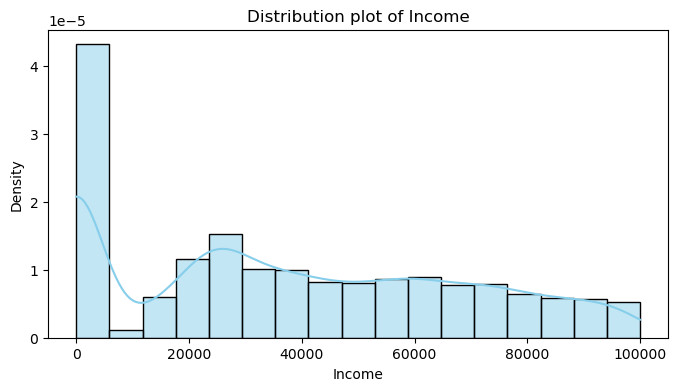

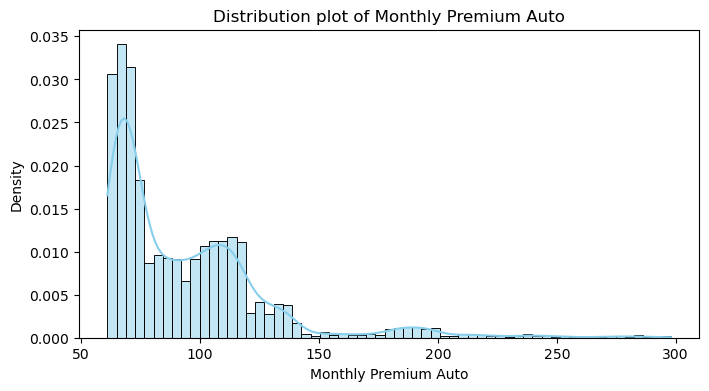

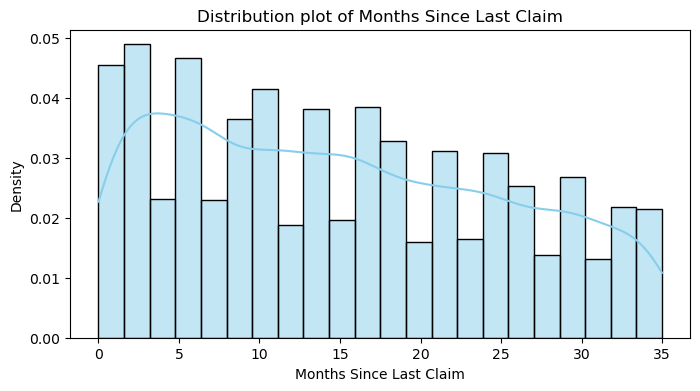

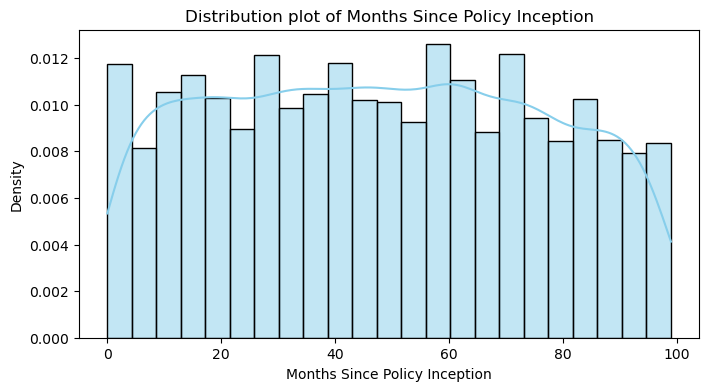

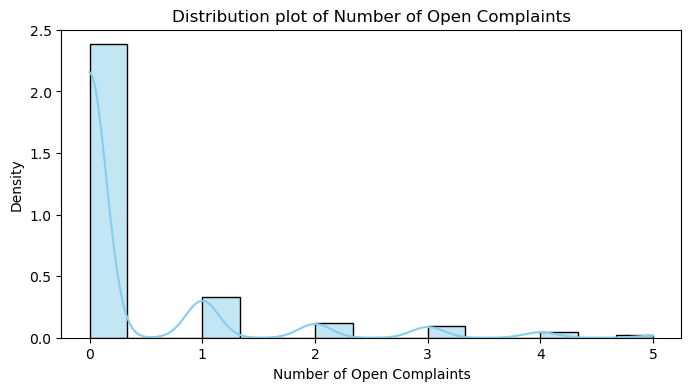

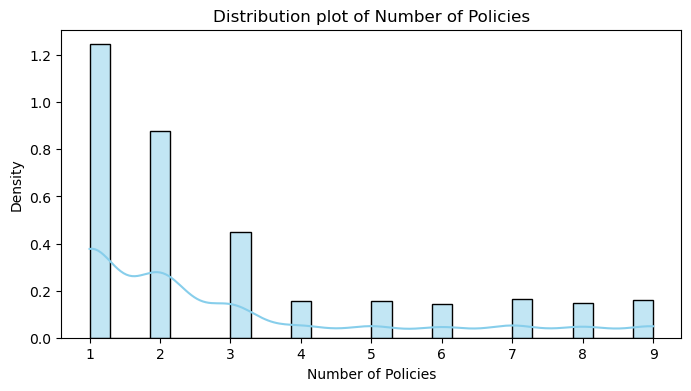

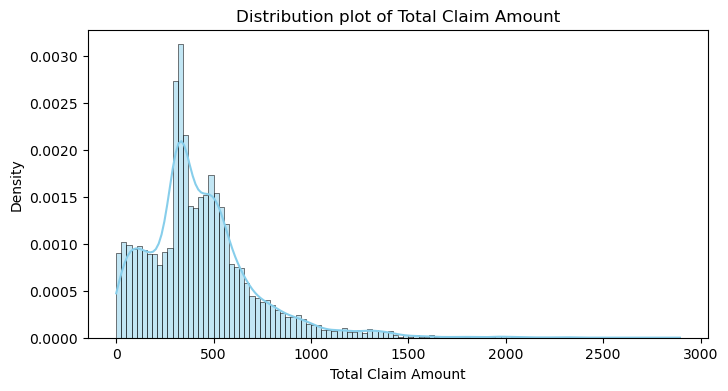

In [38]:
# get distribution (density) plots for each variable in the num dataset 
for var in num:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=dataset, x=var, kde=True, stat="density", color='skyblue')
    plt.title(f"Distribution plot of {var}")
    plt.show()

From the density plots provided, we see that in general there is not a good fit to a normal distribution, except for 'customer lifetime value' 

# 4 log transformation 

We apply log transformation to see if there is a better fit to a normal or exponential distribution 

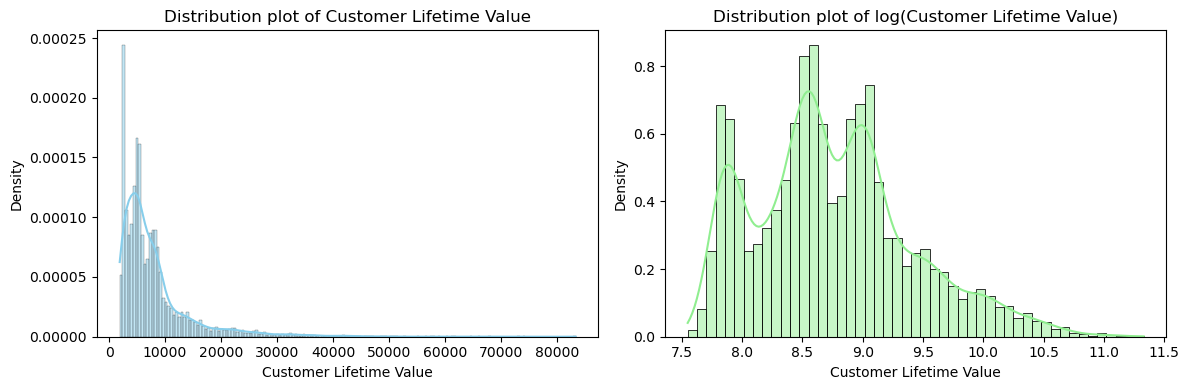

C:\Users\ruizg\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


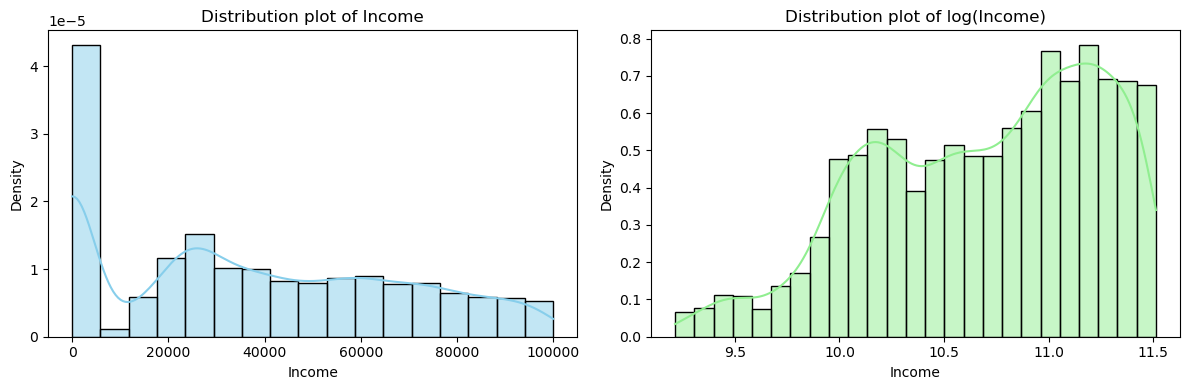

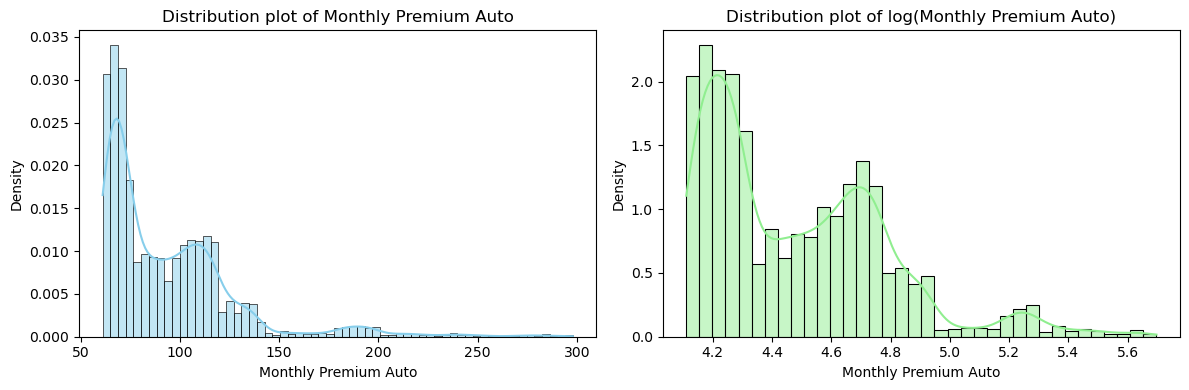

C:\Users\ruizg\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


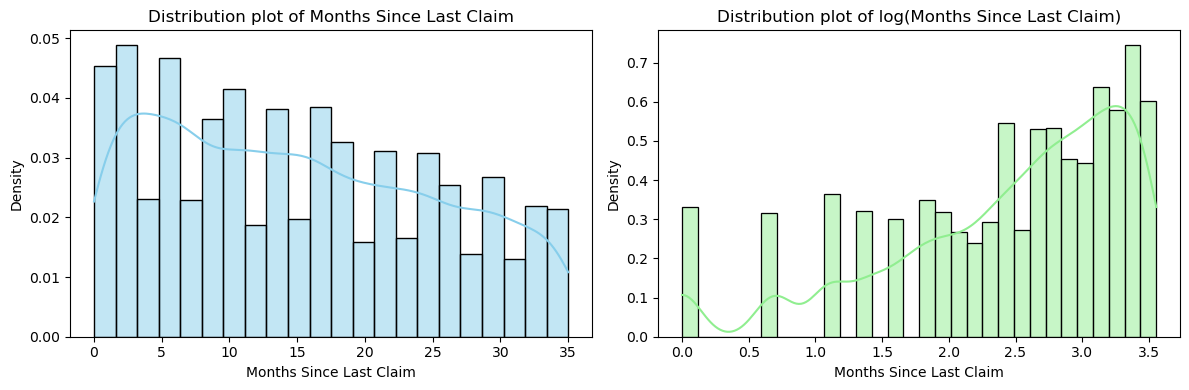

C:\Users\ruizg\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


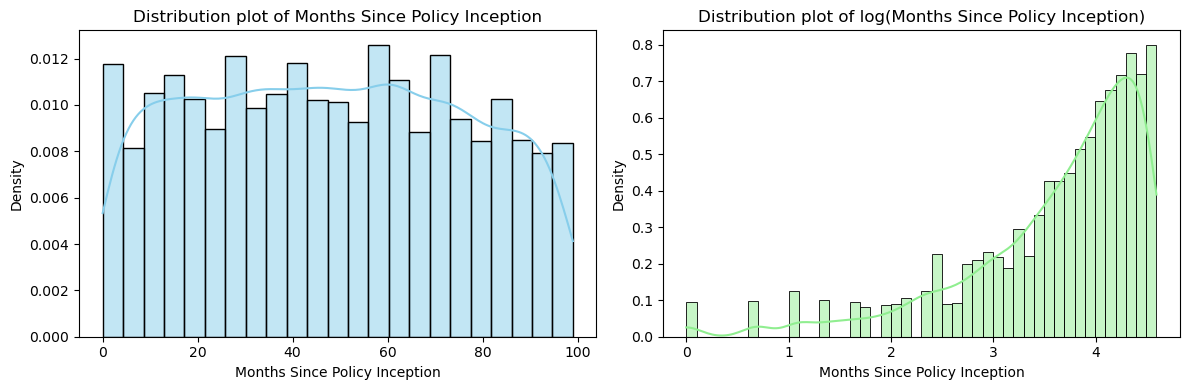

C:\Users\ruizg\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


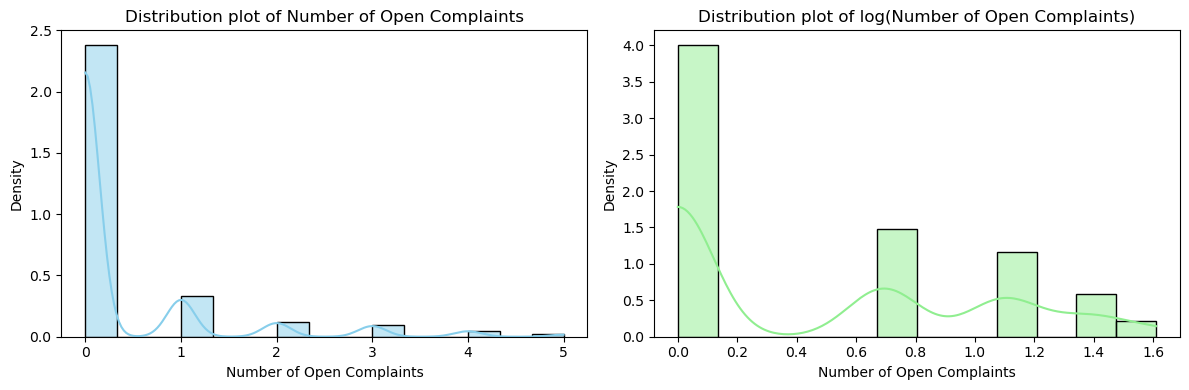

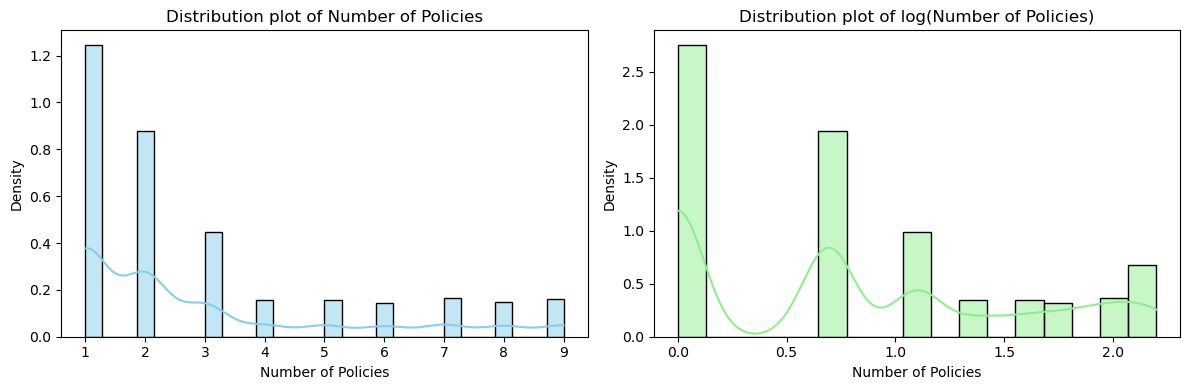

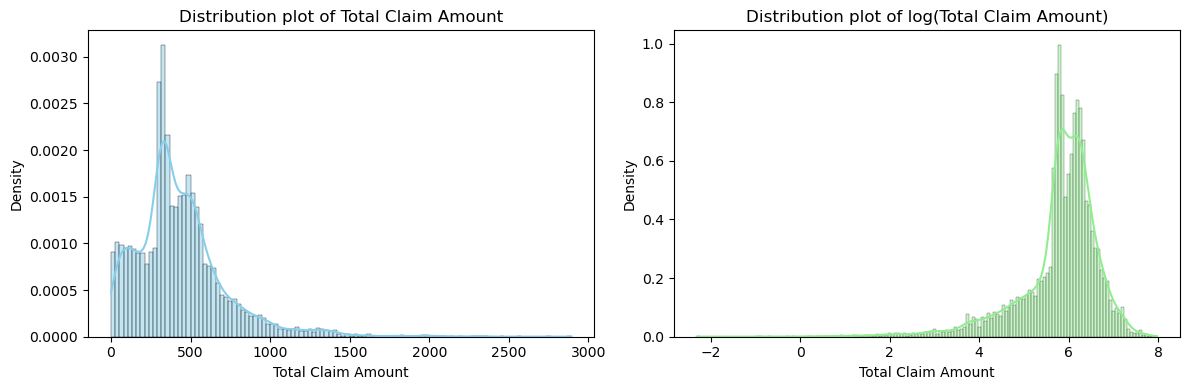

In [39]:
# Apply transformations and plot distribution plots
for var in num:
    plt.figure(figsize=(12, 4))
    
    # Original variable
    plt.subplot(1, 2, 1)
    sns.histplot(data=dataset, x=var, kde=True, stat="density", color='skyblue')
    plt.title(f"Distribution plot of {var}")
    
    # Transformed variable (log-transform)
    plt.subplot(1, 2, 2)
    transformed_var = np.log(dataset[var])
    sns.histplot(data=transformed_var, kde=True, stat="density", color='lightgreen')
    plt.title(f"Distribution plot of log({var})")
    
    plt.tight_layout()
    plt.show()

We see that in the variable "months since last policy inception" log transformation makes the density plot look more like an exponential distribution 